In [1]:
from oceanum.datamesh import Connector, Datasource
datamesh=Connector()

In [2]:
ds=datamesh.load_datasource('linz-bay-of-plenty_2019-2022-dem_1m-2193')

In [3]:
ds

<xarray.Dataset> Size: 155GB
Dimensions:      (band: 1, y: 187200, x: 206400)
Coordinates:
  * band         (band) int64 8B 1
    spatial_ref  int64 8B ...
  * x            (x) float64 2MB 1.847e+06 1.847e+06 ... 2.054e+06 2.054e+06
  * y            (y) float64 1MB 5.687e+06 5.687e+06 ... 5.874e+06 5.874e+06
Data variables:
    band_data    (band, y, x) float32 155GB dask.array<chunksize=(1, 7200, 4800), meta=np.ndarray>

In [28]:
dset=ds.isel(x=slice(100000,101000),y=slice(100000,101000))
sample=dset['band_data'].compute()

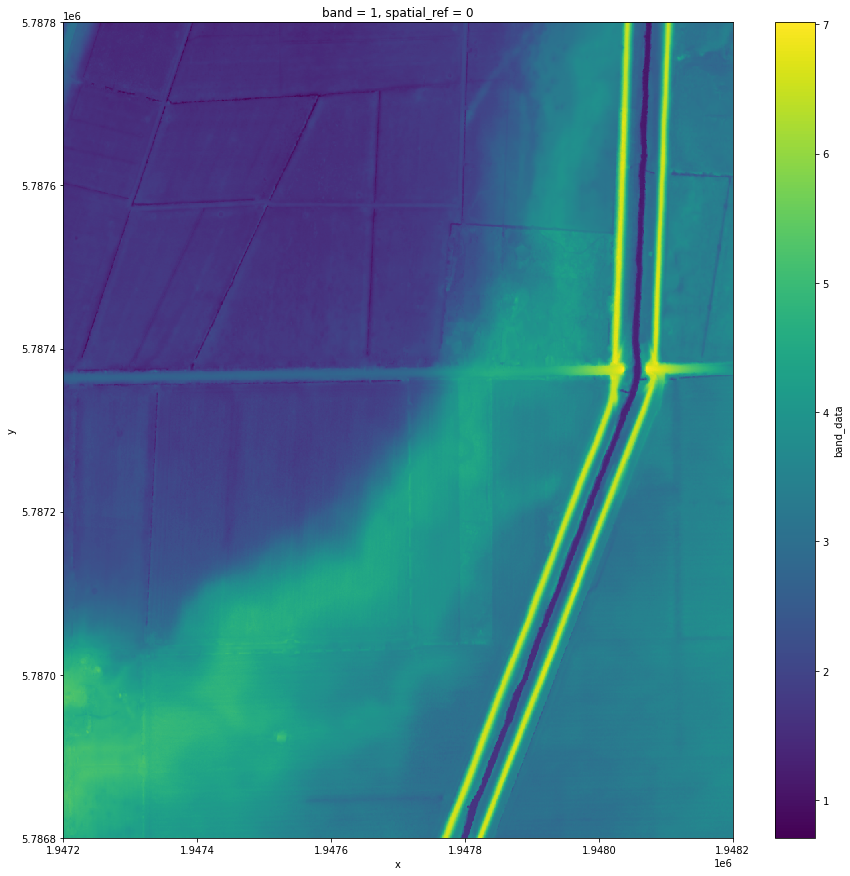

In [29]:
%matplotlib inline
fig=dset['band_data'].plot(figsize=(15,15))

#### 

In [20]:
from oceanum.datamesh import Connector
#Put your datamesh token in the Jupyterlab settings, or as argument in the constructor below
datamesh=Connector()
west_coast_dem=datamesh.query({
  "id": "9c9f8732ceecf81d8419f625b59ee342",
  "label": "west coast dem",
  "geofilter": {
    "geom": [
      174.15798942154973,
      -38.433438553933584,
      174.9716312471787,
      -37.30769647068231
    ],
    "type": "bbox",
    "interp": "linear"
  },
  "datasource": "linz-waikato_2021-dem_1m-2193",
  "description": "Waikato LiDAR 1m DEM (2021)"
})

/home/dave/.local/lib/python3.10/site-packages/oceanum/datamesh/connection.py:247: UserWarning: Query is too large for direct access, using lazy access with dask
  warnings.warn(


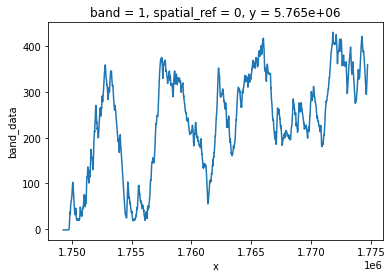

In [23]:
#Get a single slice west-to-east
west_coast_dem['band_data'].isel(y=20000).plot()